### EDA & Features for SF Crime DATA

In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig_size=[]
fig_size.append(20)
fig_size.append(20)
plt.rcParams["figure.figsize"] = fig_size

In [217]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


### Data:

- **Dates**: timestamp of the crime incident
- **Category**: category if the crime incident (only in train.csv) **Response**
- **Descript**: detailed description of the crime incident (only in train.csv)
- **DayofWeek**: the day of the week
- **PdDistrict** : name of the Police Department District
- **Resolution**: how the crime incident was resolved (only in train.csv)
- ** Address**: the approximate street address of the crime incident
- **X**: Longitude
- **Y**: Latitude

In [218]:
X_train = train.drop(['Descript','Resolution'], axis=1)
y_train = train['Category']

### Maybe a column of hour (1-24) can help?

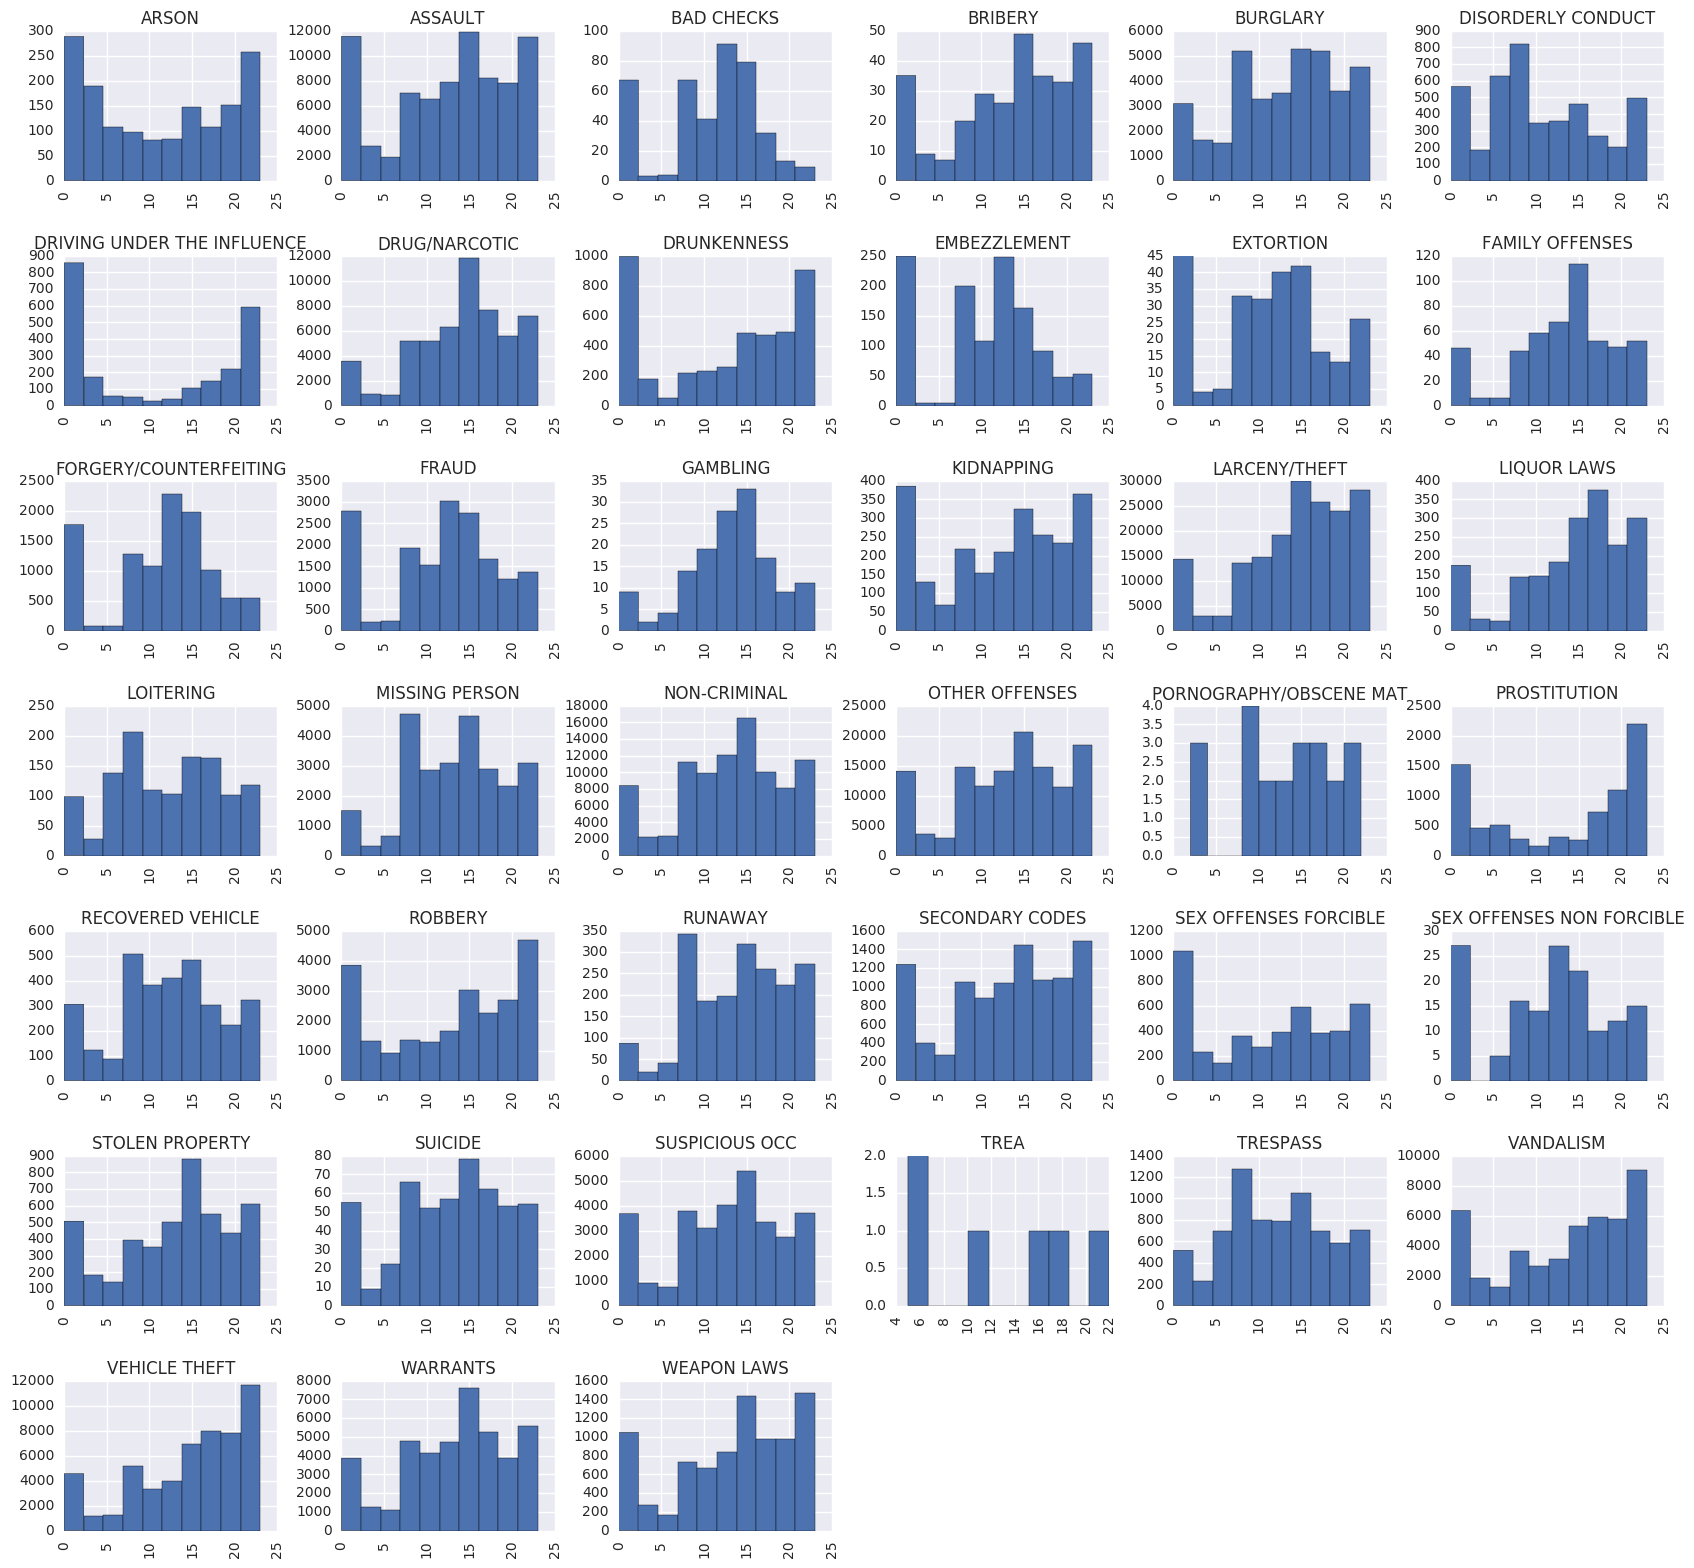

In [48]:
def hour(x):
    y=x[-8:-6]
    return int(y)
width = 12
height = 20

X_train['Hour'] = map(hour, X_train.Dates)
X_train['Hour'].hist(by=X_train['Category'])
plt.figure(figsize=(width, height))

Some categories will clearly benefit from this feature. 
For example, **Arson, Driving Under the Influence, Prostitution, Drunkenness, and Disorderly Conduct** are categories which happen late at night and very early in the morning. 

### Year & Month Columns

In [54]:
dates = X_train['Dates']
X_train['Dates'] = pd.to_datetime(dates,infer_datetime_format=True)
X_train['Year'] = X_train['Dates'].map(lambda x: x.year)
X_train['Month'] = X_train['Dates'].map(lambda x: x.month)
X_train['Day'] = X_train['Dates'].map(lambda x: x.day)
X_train.head(5)

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,Hour,Year,Month,Day
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,23,2015,5,13
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,23,2015,5,13
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,2015,5,13
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,23,2015,5,13
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,23,2015,5,13


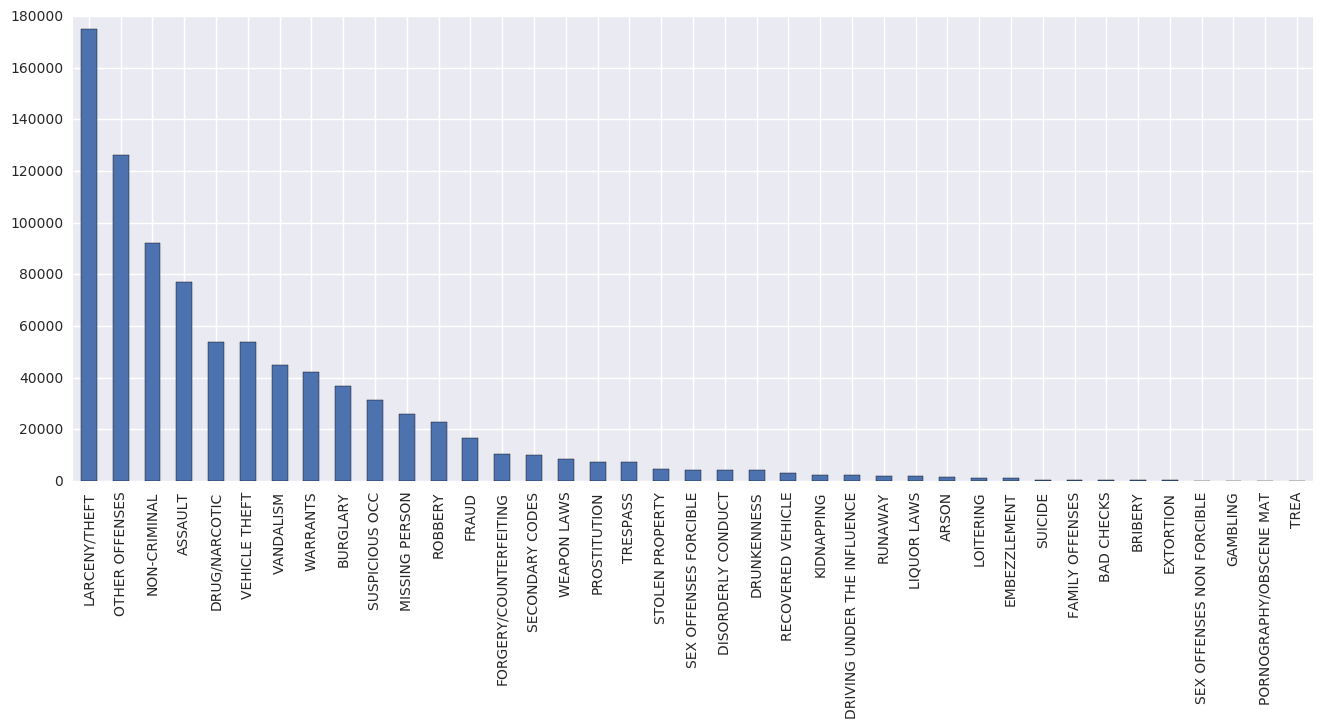

In [55]:
fig_size=[]
fig_size.append(16)
fig_size.append(6)
plt.rcParams["figure.figsize"] = fig_size
X_train.Category.value_counts().plot(kind='bar')

 - Seeing the histogram above, we can quickly deduce that the most common type of crime is **Larceny/Theft, and Other Offenses**
 - Some of the ones with the least number of occurences are Suicide, Family Offenses, Bad Checks, Bribery, Extortion, Sex Offenses, Gambling,  and Pornography.
 
 
 Below we see the distribution of Categories in percentages. 
 
 - Actually underating the top 9 or ten categories of crimes in terms of frequency is enough to get us to a classification rate of more than 75% so lets focus our EDA on those categories!

In [56]:
my_series  = X_train['Category']
counts = (my_series.value_counts() / len(X_train.Category)) * 100
counts

LARCENY/THEFT                  19.919162
OTHER OFFENSES                 14.370724
NON-CRIMINAL                   10.512397
ASSAULT                         8.755320
DRUG/NARCOTIC                   6.146696
VEHICLE THEFT                   6.125057
VANDALISM                       5.093679
WARRANTS                        4.807704
BURGLARY                        4.185985
SUSPICIOUS OCC                  3.577705
MISSING PERSON                  2.959858
ROBBERY                         2.619444
FRAUD                           1.899552
FORGERY/COUNTERFEITING          1.208247
SECONDARY CODES                 1.137180
WEAPON LAWS                     0.974319
PROSTITUTION                    0.852344
TRESPASS                        0.834350
STOLEN PROPERTY                 0.517055
SEX OFFENSES FORCIBLE           0.499744
DISORDERLY CONDUCT              0.492000
DRUNKENNESS                     0.487444
RECOVERED VEHICLE               0.357383
KIDNAPPING                      0.266614
DRIVING UNDER TH

## Plot the count of top 10 crime

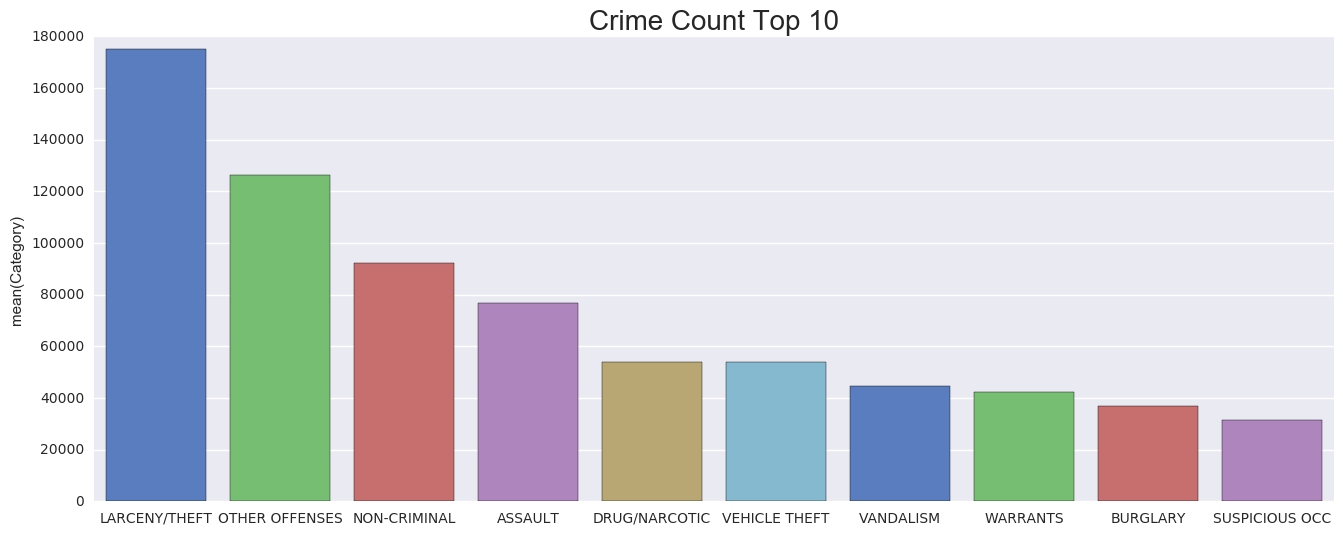

In [89]:
category = pd.DataFrame(X_train["Category"].value_counts())

ax1 =  plt.subplot2grid((1,1),(0,0))
ax1.set_title('Crime Count Top 10', size=20)
sns.barplot(x=category.head(10).index, y="Category", 
            data=category.head(10), 
            palette = "muted")

plt.figure(figsize=(10,6))

## Plot the count of top 10 crime by police district

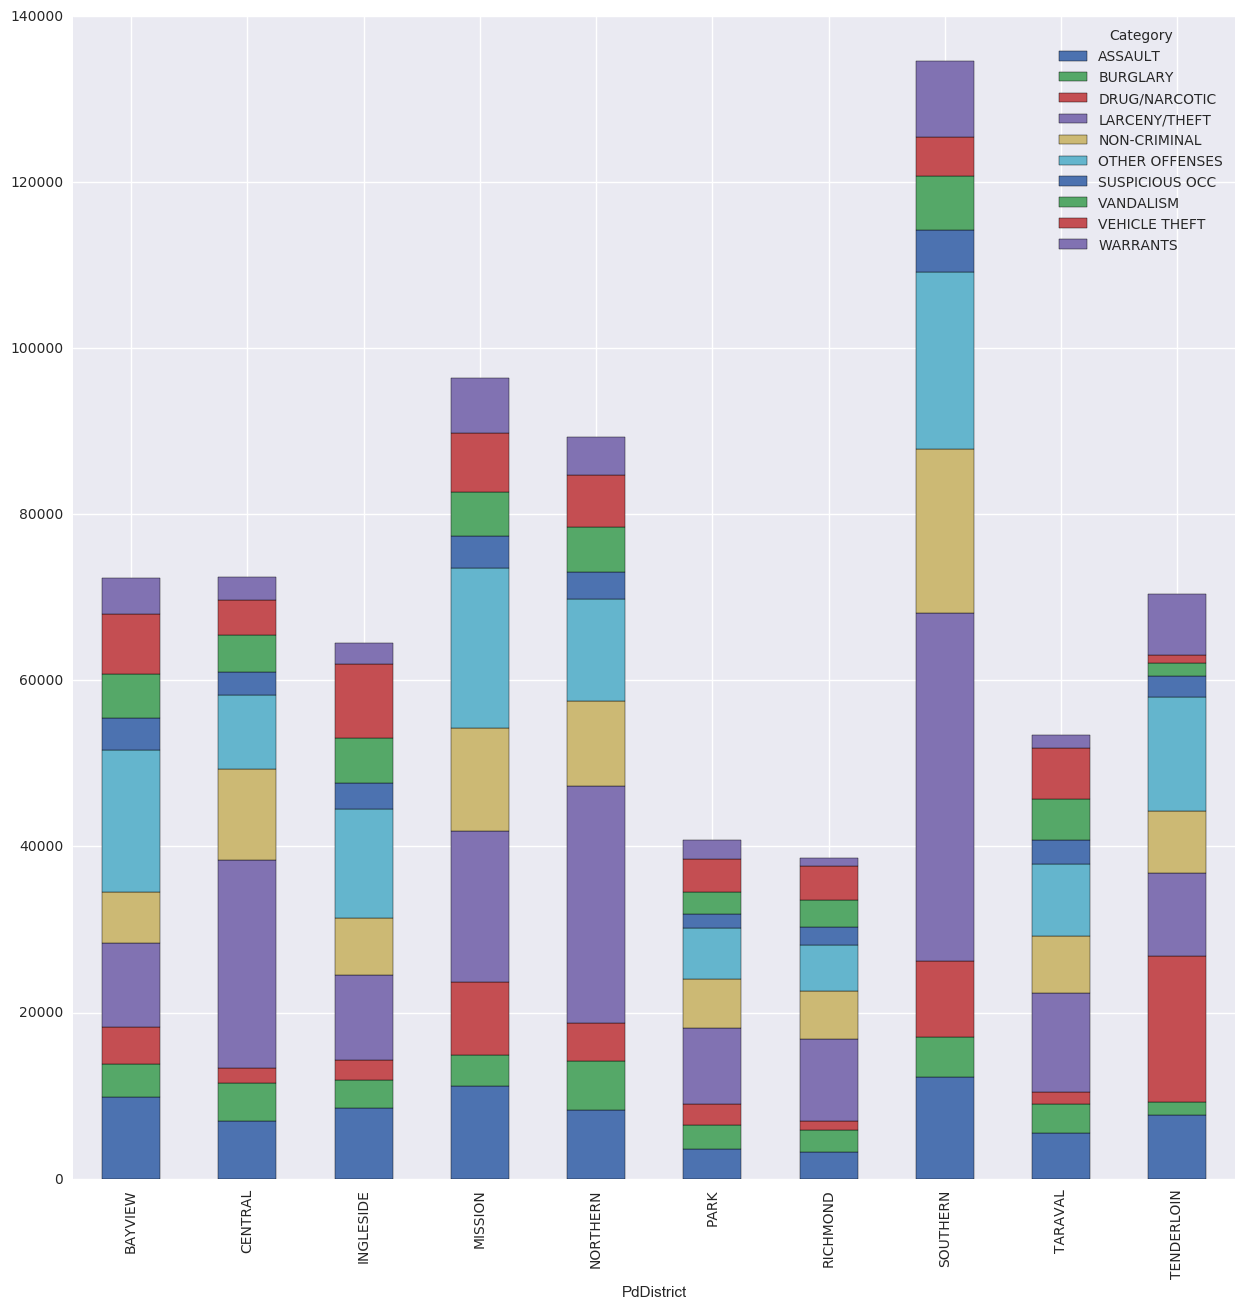

In [154]:
top10index = pd.Series(category.head(10).index)
top10 = X_train[X_train['Category'].isin(top10index)]

temp = pd.DataFrame(top10.groupby(['PdDistrict','Category']).size(), columns=['count'])
temp.reset_index(inplace=True)
temp = temp.pivot(index='PdDistrict',columns='Category',values='count')

fig, axes = plt.subplots(1,1,figsize=(15,15))
temp.plot(ax = axes, kind = 'bar', stacked = True)

In [151]:
from io import BytesIO
import Image
# Use "from PIL import Image" if "import Image" doesn't work
import urllib

In [ ]:
url = "http://maps.googleapis.com/maps/api/staticmap?center=37.774599,-122.425892&size=800x800&zoom=13"
buffer = BytesIO(urllib.urlopen(url).read())
image = Image.open(buffer)
# Or using pyplot
plt.imshow(image)
plt.show()